# Explore here

In [2]:
# Your code here

import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
data = pd.read_csv(url)


In [7]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Drop columns with too many missing values (optional)
data = data.dropna(axis=1, thresh=0.8 * len(data))

# Drop rows with missing values (optional)
data = data.dropna()

# Check data types
print(data.dtypes)

# Example: Drop non-numeric columns if not useful for analysis
data = data.select_dtypes(include=[float, int])

# Check correlations with the target variable


Series([], dtype: int64)
fips                        int64
TOT_POP                     int64
0-9                         int64
0-9 y/o % of total pop    float64
19-Oct                      int64
                           ...   
CKD_prevalence            float64
CKD_Lower 95% CI          float64
CKD_Upper 95% CI          float64
CKD_number                  int64
Urban_rural_code            int64
Length: 108, dtype: object


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = data.drop('Heart disease_number', axis=1)
y = data['Heart disease_number']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 140423.3664629388
R^2 Score: 0.9983956286637987


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.796e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.833e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

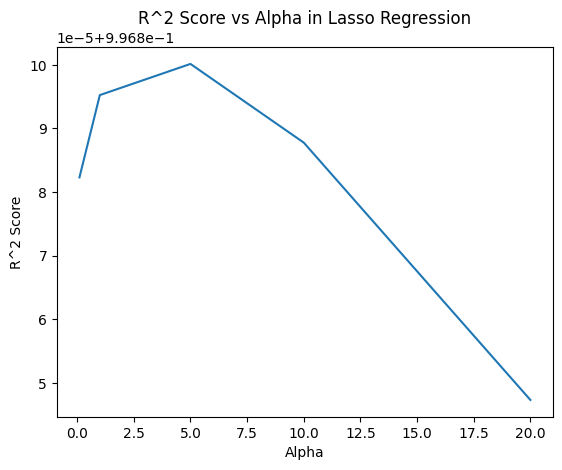

In [10]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Test different alpha values
alphas = [0.1, 1, 5, 10, 20]
r2_scores = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred_lasso))

# Plot R^2 scores against alpha values
plt.plot(alphas, r2_scores)
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs Alpha in Lasso Regression')
plt.show()


In [11]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Lasso regression
param_grid = {'alpha': [0.1, 1, 5, 10, 20]}

# Perform grid search to find the best alpha value
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_cv.fit(X_train, y_train)

# Get the best model and make predictions
best_lasso = lasso_cv.best_estimator_
y_pred_best_lasso = best_lasso.predict(X_test)

# Evaluate the optimized model
best_r2 = r2_score(y_test, y_pred_best_lasso)
print(f'Optimized R^2 Score: {best_r2}')


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.015e+08, tolerance: 6.128e+07
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.809e+08, tolerance: 6.052e+07
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

Optimized R^2 Score: 0.9968952299802195


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.732e+08, tolerance: 4.312e+07
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.833e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(
